In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

In [2]:
df_hourly = pd.read_csv("../m4_data/hourly-train.csv")
df_daily = pd.read_csv("../m4_data/Daily-train.csv")
df_monthly = pd.read_csv("../m4_data/Monthly-train.csv")
df_quarterly = pd.read_csv("../m4_data/Quarterly-train.csv")
df_weekly = pd.read_csv("../m4_data/Weekly-train.csv")
df_yearly = pd.read_csv("../m4_data/Yearly-train.csv")
print(f"daily shape: {df_daily.shape}")
print(f"monthly shape: {df_monthly.shape}")
print(f"quarterly shape: {df_quarterly.shape}")
print(f"weekly shape: {df_weekly.shape}")
print(f"yearly shape: {df_yearly.shape}")

daily shape: (4227, 9920)
monthly shape: (48000, 2795)
quarterly shape: (24000, 867)
weekly shape: (359, 2598)
yearly shape: (23000, 836)


### Idea
search engine that has m-competition as training set as baseline in it 
you can upload a time series an retrieve the k closest time series
parameter can be how many coeefficients from the transform you can keep
find all time series with a threshold less than x
do with FFT and wavelets

### outline
create a database that allows you to enter time series and you can find the right training data based on few data samples that you have with very low compute time

201


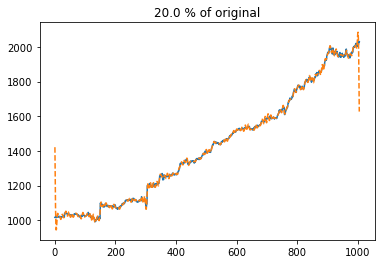

150


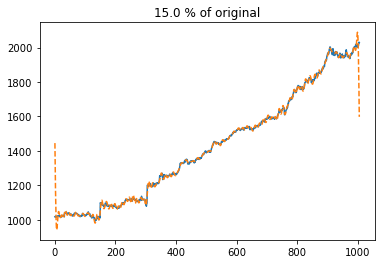

100


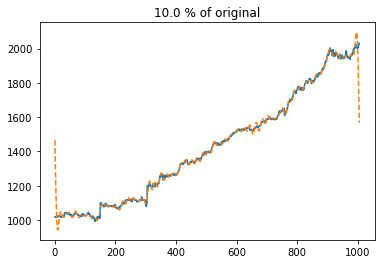

50


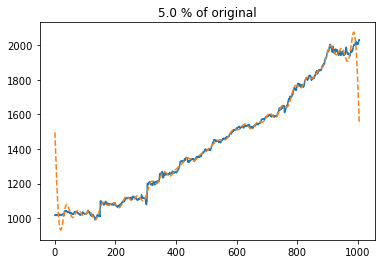

10


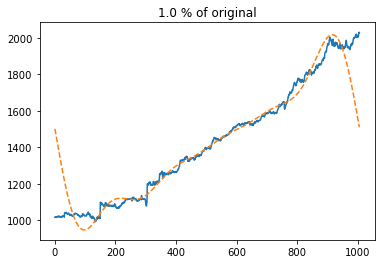

1


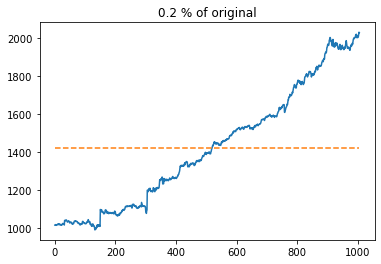

0


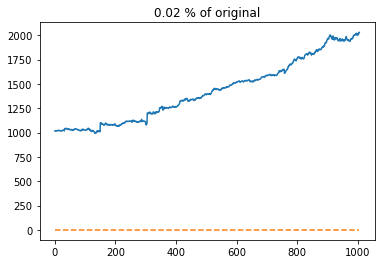

In [26]:
tsSort = np.sort(np.abs(foo))

error = []

for keep in (0.2, 0.15, 0.1, 0.05, 0.01, 0.002, 0.0002):
    thresh = tsSort[int(np.floor((1-keep)*len(tsSort)))]
    idx = np.abs(foo)>thresh         # find indexes larger than threshold
    print(idx.sum())
    tsTlow = foo * idx               # apply threshold to the transformed ts
    tsLow = np.fft.ifft(tsTlow).real # rebuild ts from compressed transformation.
    np.square(np.abs(foo) - np.abs(tsLow)).sum()  # compute error
    x = np.array(range(foo.shape[0]))
    
    # error
    error.append(np.square(np.abs(ar) - np.abs(tsLow)).sum())
    
    # plotting
    plt.plot(x, ar)
    plt.plot(x, tsLow, linestyle='--')
    title = str(keep*100) + " % of original"
    plt.title(title)
    plt.show()
    
    

<ipython-input-27-96029a42afeb>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="PSD of ts")
/Users/philipp/anaconda3/envs/unic2/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


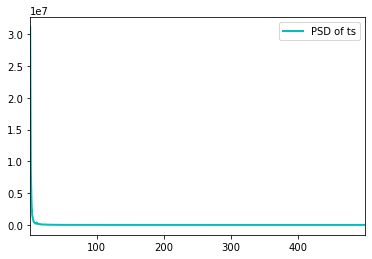

In [27]:
n = ar.shape[0]
dt = 0.001
fhat = np.fft.fft(ar)  # compute the FFT
PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
L = np.arange(1,np.floor(n/2), dtype='int')

plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="PSD of ts")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

100%|██████████| 1/1 [00:00<00:00, 70.60it/s]

164
ts: M165


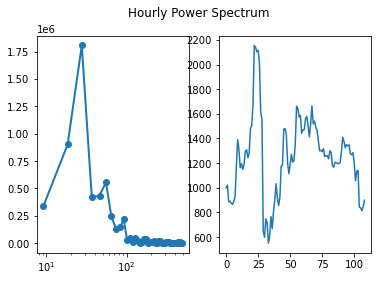

In [42]:
fig, axes = plt.subplots(1, 2)
axes.flatten()[0].set_xscale('log')
rand_ts = np.random.randint(df_hourly.shape[0])
print(rand_ts)
for ts_name in tqdm([df_monthly.loc[rand_ts,'V1']]):
    print("ts: {}".format(ts_name))
    ar = np.array(df_monthly[df_monthly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    axes.flatten()[0].plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
    axes.flatten()[1].plot(ar)
title = "Hourly Power Spectrum"
fig.suptitle(title)
plt.show()

 22%|██▏       | 913/4227 [00:17<01:02, 53.17it/s]


KeyboardInterrupt: 

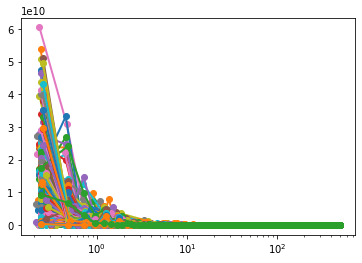

In [15]:
fig, axes = plt.subplots(1, 1, sharey=True)
axes.set_xscale('log')
for ts_name in tqdm(df_daily.iloc[rand_,0]):
    ar = np.array(df_daily[df_daily['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    plt.plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
title = "Daily Power Spectrum"
fig.suptitle(title)
plt.show()

100%|██████████| 48000/48000 [08:17<00:00, 96.49it/s] 


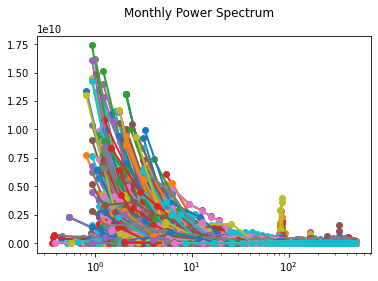

In [6]:
fig, axes = plt.subplots(1, 1, sharey=True)
axes.set_xscale('log')
for ts_name in tqdm(df_monthly.iloc[:,0]):
    ar = np.array(df_monthly[df_monthly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    plt.plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
title = "Monthly Power Spectrum"
fig.suptitle(title)
plt.show()

100%|██████████| 24000/24000 [02:29<00:00, 160.11it/s]


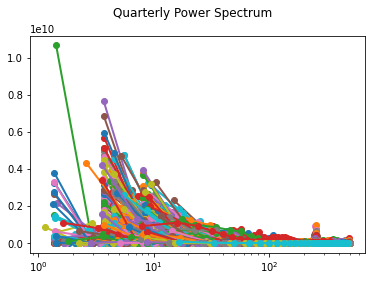

In [7]:
fig, axes = plt.subplots(1, 1, sharey=True)
axes.set_xscale('log')
for ts_name in tqdm(df_quarterly.iloc[:,0]):
    ar = np.array(df_quarterly[df_quarterly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    plt.plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
title = "Quarterly Power Spectrum"
fig.suptitle(title)
plt.show()

100%|██████████| 359/359 [00:02<00:00, 140.04it/s]


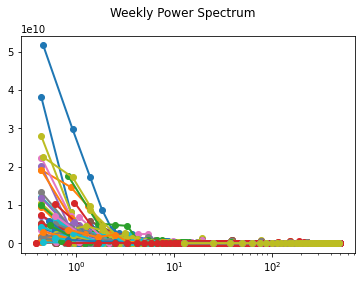

In [8]:
fig, axes = plt.subplots(1, 1, sharey=True)
axes.set_xscale('log')
for ts_name in tqdm(df_weekly.iloc[:,0]):
    ar = np.array(df_weekly[df_weekly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    plt.plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
title = "Weekly Power Spectrum"
fig.suptitle(title)
plt.show()

100%|██████████| 23000/23000 [02:08<00:00, 178.68it/s]


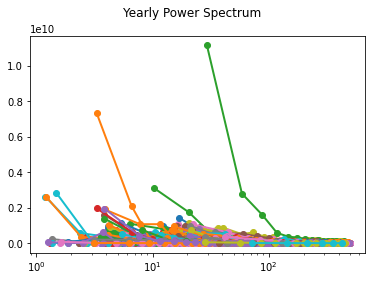

In [9]:
fig, axes = plt.subplots(1, 1, sharey=True)
axes.set_xscale('log')
for ts_name in tqdm(df_yearly.iloc[:,0]):
    ar = np.array(df_yearly[df_yearly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    plt.plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
title = "Yearly Power Spectrum"
fig.suptitle(title)
plt.show()

## How to compare with Fourier transform

Idea: split spectrogram frequencies into increasingly long spaces to and count the number of peaks in there to identify whether two time series are alike

In [10]:
from tqdm import tqdm

In [ ]:
def run_psd():
    for ts_name in tqdm(df_quarterly.iloc[:,0]):
        ar = np.array(df_quarterly[df_quarterly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
        n = ar.shape[0]
        dt = 0.001
        fhat = np.abs(np.fft.fft(ar))  # compute the FFT
        PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
        freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
        L = np.arange(1,np.floor(n/2), dtype='int')

## Create frequency distribution
1. each base frequency + occurence + N
2. each individual frequency occurence in all data sets

In [13]:
df_l = [df_hourly, df_daily, df_weekly, df_monthly, df_quarterly, df_yearly]

In [14]:
dt = 0.001
df_cols = ['ts_name', 'type', 'dt', 'n', 'freq_multiple']
df_f_base = pd.DataFrame(columns=df_cols)
l_freq = list()

# loop over all datasets
for df_ts in tqdm(df_l):
    # loop over each series in a dataset
    for ts_name in df_ts.iloc[:,0]:
        ar = np.array(df_ts[df_ts['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]


        n = ar.shape[0]
        fhat = np.abs(np.fft.fft(ar))  # compute the FFT
        PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
        freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
        L = np.arange(1,np.floor(n/2), dtype='int')

        # capture base data for ts
        df_f_base = df_f_base.append(pd.DataFrame([[ts_name, ts_name[0],
                                                    dt, ar.shape[0],
                                                   (1/(dt*n))]],
                                                 columns=df_cols))

        # count occurence of individual frequencies
        l_freq.extend(list(freq))
        
df_f_base.reset_index(inplace=True, drop=True)
#pd.to_csv("./df_f_base.csv", index=False)

100%|██████████| 6/6 [31:45<00:00, 317.55s/it]


AttributeError: module 'pandas' has no attribute 'to_csv'

In [19]:
df_f_base.head()

,ts_name,type,dt,n,freq_multiple
0,H1,H,0.001,700,1.428571
1,H2,H,0.001,700,1.428571
2,H3,H,0.001,700,1.428571
3,H4,H,0.001,700,1.428571
4,H5,H,0.001,700,1.428571


In [18]:
df_f_base.to_csv("./df_f_base.csv", index=False)

In [15]:
len(l_freq)

24002047

In [91]:
df_f_base.head()

,ts_name,type,dt,n,freq_multiple
0,D1,D,0.001,1006.0,0.994036
1,D2,D,0.001,1006.0,0.994036
2,D3,D,0.001,130.0,7.692308
3,D4,D,0.001,169.0,5.917160
4,D5,D,0.001,156.0,6.410256


array([[<AxesSubplot:title={'center':'freq_multiple'}>]], dtype=object)

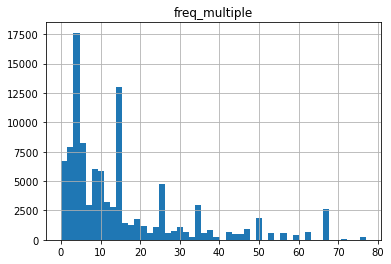

In [93]:
df_f_base.hist('freq_multiple', bins=50)

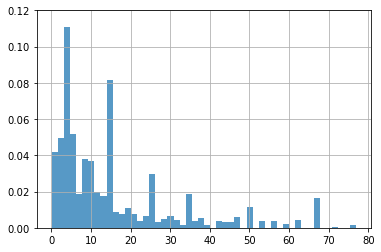

In [110]:
n, bins, patches, = plt.hist(df_f_base['freq_multiple'], 50, density=True, alpha=.75)
# foo = 'Freq'
# plt.xlabel(foo)
# plt.ylabel('Probability')
#plt.title('Histogram Base Frequencies M4 competition')
plt.ylim(0, 0.12)
plt.grid(True)
plt.show()

### Creating Frequency Ranges

In [ ]:
dt = 0.001
df_approx_cols = ['ts_name', 'fhat', 'PSD', 'freq', 'freq_approx']
f_ranges = 10**np.linspace(-1, 3, 410)
#f_ranges = np.append(0, f_ranges)
df_approx = pd.DataFrame(columns=df_approx_cols)
l_freq = list()

# loop over all datasets
for df_ts in df_l:
    # loop over each series in a dataset
    for ts_name in tqdm_notebook(df_ts.iloc[:,0]):
        ar = np.array(df_ts[df_ts['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]


        n = ar.shape[0]
        fhat = np.abs(np.fft.fft(ar))  # compute the FFT
        PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
        freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
        L = np.arange(1,np.floor(n/2), dtype='int')
        
        # create df_approx for comparison
        df_approx = df_approx.append(pd.DataFrame({'ts_name': [ts_name]*len(freq),
                                                   'fhat': fhat,
                                                   'PSD': PSD,
                                                   'freq': freq}))
#                                                    'freq_approx': np.digitize(freq, f_ranges,
#                                                                              right=True)}))
    
        
df_approx.reset_index(inplace=True, drop=True)


<ipython-input-222-ccf8f089452c>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ts_name in tqdm_notebook(df_ts.iloc[:,0]):


  0%|          | 0/414 [00:00<?, ?it/s]

<ipython-input-222-ccf8f089452c>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ts_name in tqdm_notebook(df_ts.iloc[:,0]):


  0%|          | 0/4227 [00:00<?, ?it/s]

<ipython-input-222-ccf8f089452c>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ts_name in tqdm_notebook(df_ts.iloc[:,0]):


  0%|          | 0/359 [00:00<?, ?it/s]

<ipython-input-222-ccf8f089452c>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ts_name in tqdm_notebook(df_ts.iloc[:,0]):


  0%|          | 0/48000 [00:00<?, ?it/s]

In [219]:
df_approx.to_csv("../df_approx.csv", index=False)

In [208]:
def associate_ranges(x, ranges) -> pd.Series:
    if x == 0:
        return 0
    s = np.digitize(x, ranges)
    return ranges[s]

In [209]:
df_approx['freq_approx'] = df_approx['freq'].apply(associate_ranges, args=(f_ranges,))

In [215]:
f_ranges[-1]

1000.0

In [211]:
#df_approx['freq_approx'] = df_approx.groupby('ts_name')['freq'].apply(lambda x: np.digitize(x, f_ranges))
df_approx.head(20)

,ts_name,fhat,PSD,freq,freq_approx
0,H1,446942.000000,2.853674e+08,0.000000,0.000000
1,H1,15866.839250,3.596523e+05,1.428571,1.458190
2,H1,10669.570567,1.626282e+05,2.857143,2.865581
3,H1,6502.694112,6.040719e+04,4.285714,4.297856
4,H1,5302.624582,4.016832e+04,5.714286,5.759585
5,H1,3742.332612,2.000722e+04,7.142857,7.214242
6,H1,6193.620757,5.480134e+04,8.571429,8.638340
7,H1,7767.619076,8.619415e+04,10.000000,10.113232
8,H1,7607.129449,8.266917e+04,11.428571,11.576298
9,H1,1494.104710,3.189070e+03,12.857143,12.955955


In [102]:
f

159.0976

In [103]:
2.673317e+04

26733.17

In [121]:
df_tmp = pd.DataFrame({ 'name':['a', 'b', 'c', 'd', 'e'], 'value': [10,1,5,4,7]})

In [111]:
df_tmp.head()

,name,value
0,a,10
1,b,1
2,c,5
3,d,4
4,e,7


In [126]:
f_tmp = [1,3,5,8]
q_tmp = df_tmp['value'].quantile(.3)
mask = df_tmp['value']>q_tmp
mask
#df_tmp['r'] = np.digitize(df_tmp[mask]['value'], f_tmp)

0     True
1    False
2     True
3    False
4     True
Name: value, dtype: bool

In [120]:
df_tmp

array([4, 3, 3])

In [101]:
df_tmp['PSD'].quantile(.97)

46193.820519135894

In [ ]:
df_approx.to_csv("../df_approx.csv", index=False)

In [22]:
df_approx.head()

,ts_name,fhat,PSD,freq,freq_approx
0,H1,446942.000000,2.853674e+08,0.000000,10
1,H1,15866.839250,3.596523e+05,1.428571,25
2,H1,10669.570567,1.626282e+05,2.857143,39
3,H1,6502.694112,6.040719e+04,4.285714,41
4,H1,5302.624582,4.016832e+04,5.714286,41


In [47]:
df_approx['PSD']>df_approx.PSD.quantile(.9)

0         True
1        False
2        False
3        False
4        False
         ...  
11879     True
11880     True
11881     True
11882     True
11883     True
Name: PSD, Length: 11884, dtype: bool

In [51]:
df_test = pd.DataFrame(['A','B','C','D','F'], columns=['items'])

In [54]:
df_test['items'].tolist()

['A', 'B', 'C', 'D', 'F']

In [55]:
import random

In [57]:
random.sample(df_test['items'].tolist(), 3)

['D', 'B', 'F']

In [59]:
df_appr = pd.read_csv('../df_approx.csv')

In [64]:
df_s = df_appr[df_appr['ts_name']=='D1100']

In [67]:
df_s.sort_values('PSD', ascending=False)

,ts_name,fhat,PSD,freq,freq_approx_idx,freq_approx
2851474,D1100,3.648068e+07,3.170933e+11,0.000000,0,0.000000
2855670,D1100,3.952504e+06,3.722251e+09,999.761735,409,1000.000000
2851475,D1100,3.952504e+06,3.722251e+09,0.238265,39,0.240668
2851476,D1100,3.303999e+06,2.601003e+09,0.476531,70,0.483723
2855669,D1100,3.303999e+06,2.601003e+09,999.523469,409,1000.000000
...,...,...,...,...,...,...
2854931,D1100,2.778768e+02,1.839779e+01,823.683584,401,835.142127
2853722,D1100,2.412903e+02,1.387205e+01,535.620681,382,544.429087
2853423,D1100,2.412903e+02,1.387205e+01,464.379319,375,465.030741
2853156,D1100,9.310833e+01,2.065561e+00,400.762449,369,406.258028


In [66]:
df_s[df_s['PSD']==317093251863.05096]

,ts_name,fhat,PSD,freq,freq_approx_idx,freq_approx
2851474,D1100,36480685.0,3.170933e+11,0.0,0,0.0
